<font size="+4">
    <CENTER>Data processing with Python </CENTER>
</font>
<hr>   
<font size="+2">
    <CENTER> B. Kieffer ESBS 2022</CENTER>
</font>
<hr>   
<font size="+2">
    <CENTER> Notebook 4</CENTER>
</font>

# 9. Defining your own functions

## Introduction

The art of programming consists in decomposing complex tasks into simple elementary ones. The processors of your computer or smartphones are only able to perform simple tasks such as adding to binary numbers. Nevertheless very complex functions are performed by these devices, thanks to the availability of evolved libraries of functions (such as those which are handling nice and colorful graphics). In python, a fonction will gather a set of instructions to perform a user-defined task. The general synthax to define a function is :

````
def function_name(parameters):
    """ Docstring describing what is the function doing """
    ...
    return 
````

As for any other names defined by the user, the function name should be different from the few reserved python words. The parameters are python objects whose content will be made available "within" the user-defined function. The return statement allows to define the result of the function. The return statement and the parameters are optionals. 

## Example: a first function

The function **sphere_volume** is used to compute the volume of a sphere according its radius. The function will take one parameter (also called argument) and **returns** one number as an object of type float.


In [9]:
def sphere_volume(radius):
    """ This function computes the volume of a sphere with a given radius"""
    
    pi = 3.142892
    vol = 4*pi*(radius**3)/3
    
    return vol

# the function is called by its name

print (type(sphere_volume(1.)))

<class 'float'>


* You will notice that variable names "outside" the function may be different than inside the function. 

* The main advantage of a function is the ability to call it several times, simplifying the code writing:

In [3]:
atoms_radius = {'C' : 0.85, 'N' : 0.85, 'H' : 0.25, 'O' : 0.9}
for ele in atoms_radius:
    pi = 3.142892
    vol = 4*pi*atoms_radius[ele]**3/3
    print (ele,vol)

C 2.5735047326666662
N 2.5735047326666662
H 0.06547691666666666
O 3.0548910240000002


In [8]:
atoms_radius = {'C' : 0.85, 'N' : 0.85, 'H' : 0.25, 'O' : 0.9}
for at in atoms_radius:
    v = sphere_volume(atoms_radius[at])
    print ("Volume of the atom of {:} : {:6.3f} ang.^3".format(at, v))

Volume of the atom of C :  2.574 ang.^3
Volume of the atom of N :  2.574 ang.^3
Volume of the atom of H :  0.065 ang.^3
Volume of the atom of O :  3.055 ang.^3


The parameter of a python function could be any object, or several objects. The following function takes a string as input and return a dictionary :

In [2]:
def decode(composition = ''):
    """ This function decode an atomic composition of a molecule 
    and return a dictionary of atomic composition
    Example of Entry : 'C6 H12' 
    Corresponding result {'C':6, 'H':12}"""
    
    atoms = {} # key : a single letter, values : number of occurence in the molecule
    at_list = composition.split() # This statement 'assumes' that the composition object is a string
    for at in at_list: # for each individual atom
        atoms[at[0]] = int(at[1:])
        
    return atoms

print (decode("C2 H6"))

{'C': 2, 'H': 6}


In [3]:
# The two previous function can be combined to compute the volume of a molecule
def molvol(composition = ''):
    """ Compute the volume of a molecule from the individual atomic composition"""
    atoms_radius = {'C' : 0.85, 'N' : 0.85, 'H' : 0.25, 'O' : 0.9}
    
    atoms = decode(composition) # Get the dictionary of the atomic composition
    total_vol = 0.    # Initialize the variable for total volume
    for at in atoms:
        total_vol = total_vol + sphere_volume(atoms_radius[at])*atoms[at]
    
    return total_vol

print (molvol('C2 H6 O1'))

8.594761989333332


## The parameters or arguments

The parameters of a function allows to transfer information (as objects) from "outside" the function to the "inside". There are several ways to perform this transfer:

* using required arguments (the position in the list of arguments defines it)
* using keyword arguments (the argument is defined by its name)


The example below illustrates the use of parameters for a function that draws a square. This function will use the turtle graphic library (a special tribute to Tomi Ungerer). The turtle commands define how a pen is moving, by specifying the length of path, the direction (heading) of motion and if the path is traced (pendown()) or not (penup()).

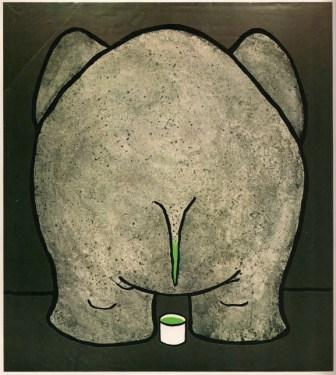

Tomi Ungerer, the elephant

The purpose here is to draw the following picture using the square function that is defined below:

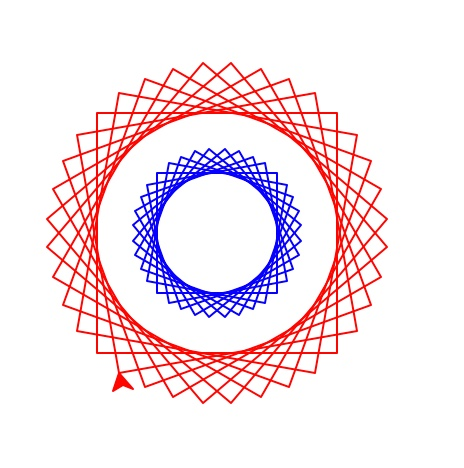


In [19]:
import turtle as tu

def draw_square(size=80,color = 'blue',ang=0.,center=[0,0]):
    ''' This function draws a square shape using the turtle graphic system
        size is the length of the square's side (default value : 80)
        the color (string) defines the color of the line
        ang is a float [.0, 360] that defines the orientation of the shape
        center is a list that defines the position (x,y) of the center of the square
        B. Kieffer Feb. 2018
    '''

    tu.penup()
    tu.home()
    tu.color(color)
    tu.setposition(center[0],center[1])
    tu.right(ang)
    tu.forward(size/2)
    tu.right(90)
    tu.forward(size/2)
    tu.right(90)
    tu.pendown()
    for i in range(4):
        tu.forward(size)
        tu.right(90)

for ang in range(10):
    draw_square(40*ang, 'blue', ang*10)
    draw_square(size = 160, color = 'red', ang=ang*10)
tu.exitonclick()
#dir(tu)

## Global and local objects

The script below shows that the value of an integer object is defined locally and the object is not changed by the function. If an object with exactly the same name exists outside the function, it will be another objects and its value won't be altered by the function. In the following, the int object my_var is defined both outside and within the function my_func(). Try to change the values in order to verify the local definition of pyhton objects.   


In [3]:
def my_func(my_var):
    print("1. inside my_func, my_var equal to ", my_var)
    my_var=my_var+1
    print("2. after change : inside my_func, my_var equal to ", my_var)
    
my_var = 1
print("outside my_func, my_var equal to ", my_var)
my_func(my_var)
print("outside my_func, my_var equal to ", my_var)
print(my_var)

outside my_func, my_var equal to  1
1. inside my_func, my_var equal to  1
2. after change : inside my_func, my_var equal to  2
outside my_func, my_var equal to  1
1


#### Notice below how the behaviour is different for a **mutable** object like a list. 

This is due to the fact that when a list is provided to a function as an argument, that name within the function is an **alias** of the list (or a nick name) and not the object itself. In other words, there is not a second copy of the object given as parameter inside the function. 

This situation is different for **non-mutable** objects such as a string or a tuple. These objects can't be modified and a copy of the values is made when they are given to a function as arguments.

In [18]:
def my_func(inside):
    print("1. inside my_func, inside equal to ", inside)
    inside.append(4) # We change the content of the list
    print("2. inside my_func, inside equal to (after change) ", inside)
    my_var=[2] # Attempt to change the global variable
    print("3. inside my_func, my_var equal to ", my_var)
    
my_var = [1,2,3] 
my_func(my_var)
print("outside my_func, my_var equal to ", my_var)

1. inside my_func, inside equal to  [1, 2, 3]
2. inside my_func, inside equal to (after change)  [1, 2, 3, 4]
3. inside my_func, my_var equal to  [2]
outside my_func, my_var equal to  [1, 2, 3, 4]


## Positional and keywords Parameters

When more than one parameters have to be given to a function, there are two possible synthaxes:

#### 1. The parameters are given sequentially :

The identification of the parameters will depend on their position in the list. Not giving the right number of parameters results into an error.

In [28]:
def fun(x,y,z):
    return x*y+z

print (fun(2,3,4))
print (fun('a',2,'b'))

# The example below illustrate that the position is 
# defining the names of the variables inside the function.
x = 2
y = 3
z = 4

#print (fun(y,z,x))

10
aab


#### 2. The parameters are given by keywords :

The synthaxe is **func(arg = value)**

In this case, a default value is provided and the user can pass the parameters in any order as long as the names (keywords) are matching those defined in the parameter list


In [3]:
def fun(x='a',y=0,z=0):
    return x*y+z

print (fun(y=3,z='d'))

# The example below illustrate that the position is 
# defining the names of the variables inside the function.
xo = 2
yo = 3
zo = 'x'

print(fun(y=yo,z=zo))

aaad
aaax


## Recursive call to a function

Some functions may use a recursive definition. This means that the computation of the result of the function depends on a result given by the same function. A well-known example of recursivity is the factorial function. When using such definitions, it is important to correctly work out the conditions at which the recursive calls will stop. 

In [2]:
def fact(n=1):
    if n>1:
        return fact(n-1)*n
    else:
        return 1

print(fact(5))

120


### Further reading

[Le cours de Gerard Swinnen](http://python.developpez.com/cours/TutoSwinnen/?page=page_9#L7.6)

[Python functions](https://www.tutorialspoint.com/python/python_functions.htm)


# Conclusions of Notebook 4

- The functions allow to orgnanize a complex task into smaller subtasks
- The function is described by its name followed by a pair of parenthesis: myfun()
- Inside the parenthesis, parameters can be provided (as input data for the subtask)
